## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
url = 'https://drive.google.com/file/d/1ZtEpyOsBHIQxl_Nn4IsUopQO3rF9ZRf3/view?usp=sharing'
url2 ='https://drive.google.com/uc?id=' + url.split('/')[-2]
DataSet = pd.read_csv(url2)

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [4]:
DataSet.Tamanho.value_counts()

53    258
64      3
Name: Tamanho, dtype: int64

In [5]:
DataSet.drop(['Hora', 'Tamanho' ],axis=1,inplace=True)

In [6]:
DataSet.head()

,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,25,69,81,68,1,0
1,26,89,87,56,1,0
2,27,68,69,55,1,0
3,28,36,50,80,1,0
4,29,71,72,50,1,0


In [7]:
DataSet.describe()

,Referencia,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,58.310345,59.777778,63.697318,54.747126,0.375479,0.624521
std,9.199888,17.293075,30.629366,35.548413,0.485177,0.485177
min,25.000000,3.000000,6.000000,17.000000,0.000000,0.000000
25%,54.000000,50.000000,46.000000,38.000000,0.000000,0.000000
50%,64.000000,59.000000,56.000000,44.000000,0.000000,1.000000
75%,64.000000,69.000000,68.000000,54.000000,1.000000,1.000000
max,64.000000,120.000000,201.000000,251.000000,1.000000,1.000000


In [8]:
DataSet

,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,25,69,81,68,1,0
1,26,89,87,56,1,0
2,27,68,69,55,1,0
3,28,36,50,80,1,0
4,29,71,72,50,1,0
...,...,...,...,...,...,...
256,64,75,82,54,0,1
257,64,22,14,25,0,1
258,44,33,32,38,0,1
259,64,45,36,32,0,1


### Váriaveis do *Dataset*

In [9]:
DataSet.columns

Index(['Referencia', 'NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

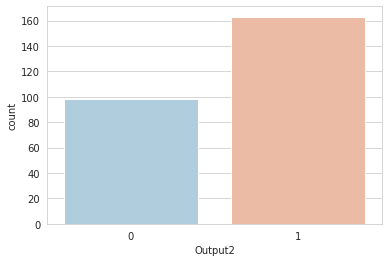

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


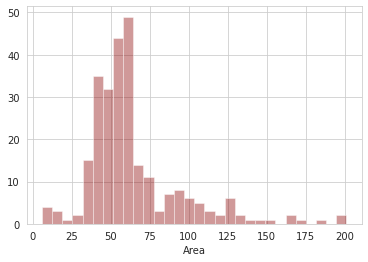

In [11]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

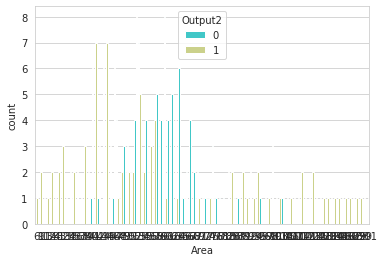

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

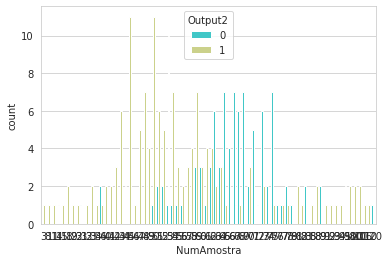

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

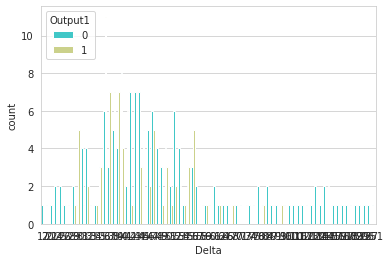

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [15]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

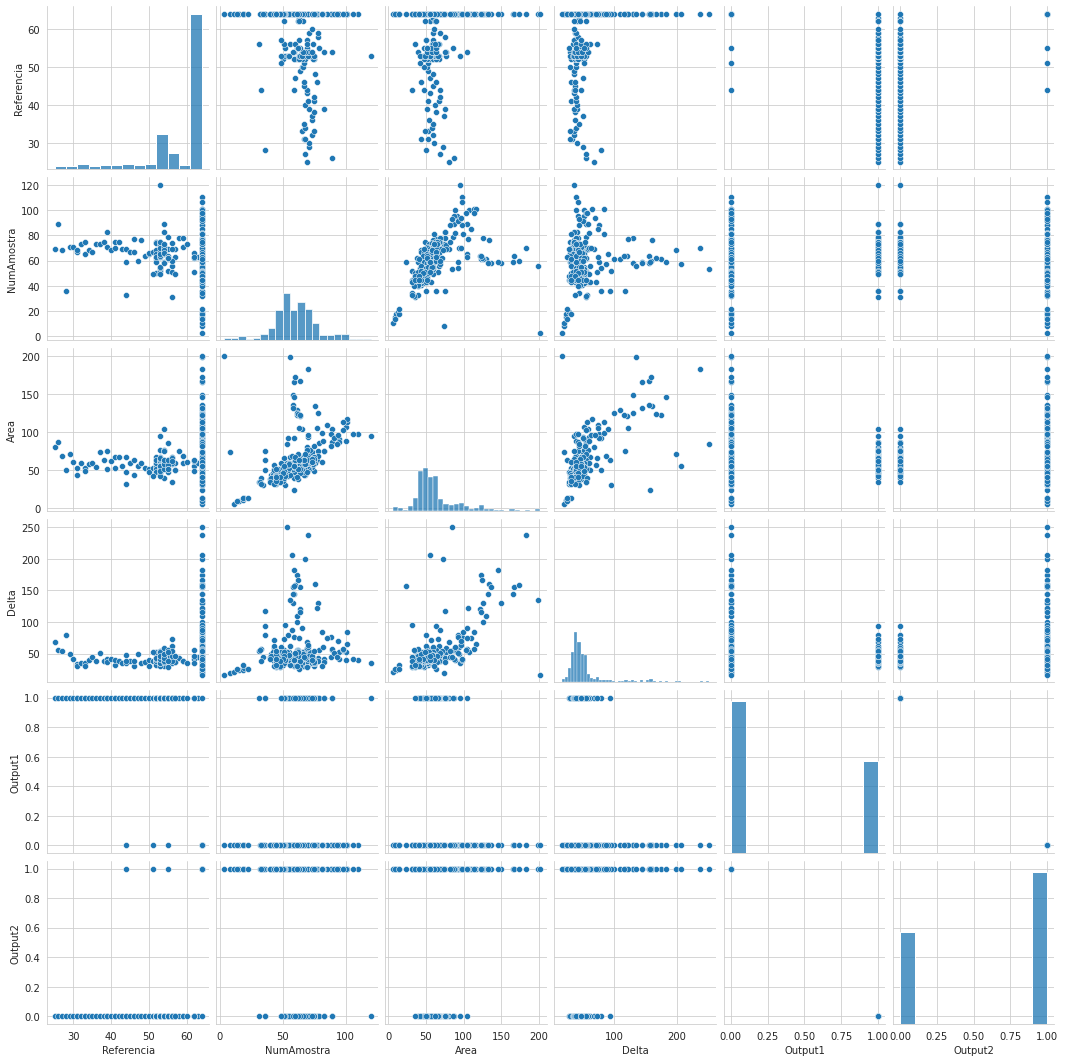

In [16]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

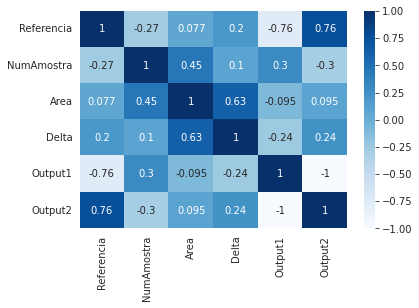

In [17]:
sns.heatmap(DataSet.corr(), annot = True,cmap='Blues', fmt='.2g')
plt.show()

## *TENTATIVA* Removendo outliers com Z score. Tentativa que não mostrou bons resultados. Acredito que devido a pouca quantidade de dados.

In [18]:
DataSet['DeltaZscore'] = (DataSet['Delta'] - DataSet['Delta'].mean()) / DataSet['Delta'].std(ddof=0)

In [19]:
DataSet['AreaZscore'] = (DataSet['Area'] - DataSet['Area'].mean()) / DataSet['Area'].std(ddof=0)

In [20]:
AreaOut = DataSet[ (abs(DataSet['DeltaZscore']) > 3)]
DeltaOut = DataSet[ (abs(DataSet['AreaZscore']) > 3)]
#DataSet = DataSet[ (abs(DataSet['DeltaZscore']) < 3)]
#DataSet = DataSet[ (abs(DataSet['AreaZscore']) < 3)]

In [21]:
AreaOut.head()

,Referencia,NumAmostra,Area,Delta,Output1,Output2,DeltaZscore,AreaZscore
125,64,70,183,237,0,1,5.136742,3.902526
136,64,68,72,199,0,1,4.065723,0.271590
140,64,53,85,251,0,1,5.531328,0.696835
154,64,61,123,175,0,1,3.389291,1.939858
166,64,62,124,166,0,1,3.135628,1.972569


In [22]:
DeltaOut.head()

,Referencia,NumAmostra,Area,Delta,Output1,Output2,DeltaZscore,AreaZscore
125,64,70,183,237,0,1,5.136742,3.902526
144,64,59,166,144,0,1,2.515565,3.346437
162,64,64,167,155,0,1,2.825597,3.379148
190,64,60,173,159,0,1,2.938336,3.575415
195,64,56,199,135,0,1,2.261903,4.425904


Não existe um caso onde Output2 == 1 e Outpu1 == 1 nem Output2 == 0 e Outpu1 == 0

In [23]:
DataSet[ ( (DataSet.Output2 == 0) & (DataSet.Output1 == 0))]

,Referencia,NumAmostra,Area,Delta,Output1,Output2,DeltaZscore,AreaZscore


In [24]:
DataSet[ ( (DataSet.Output2 == 1) & (DataSet.Output1 == 1))]

,Referencia,NumAmostra,Area,Delta,Output1,Output2,DeltaZscore,AreaZscore


##*TENTATIVA* de gerar 2 cluster pra ver como fica a classificação com k-means

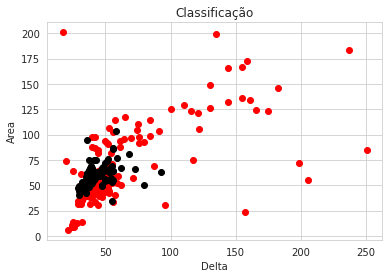

In [25]:
deltas1 = DataSet.Delta[ DataSet.Output2 ==1].to_list()
areas1 = DataSet.Area[ DataSet.Output2 == 1].to_list()
deltas0 = DataSet.Delta[ DataSet.Output2 == 0].to_list()
areas0 = DataSet.Area[ DataSet.Output2 == 0].to_list()

plt.scatter(deltas1, areas1 , color = 'red')
plt.scatter(deltas0, areas0 , color = 'black')
plt.xlabel('Delta')
plt.ylabel("Area")
plt.title("Classificação")
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_k = scaler.fit_transform(DataSet[['Area','NumAmostra', 'Referencia', 'Delta']])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_k)
DataSet['k_labels'] = kmeans.labels_

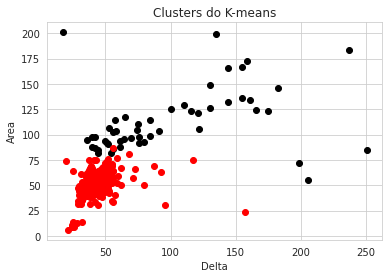

In [27]:
deltas1k = DataSet.Delta[ DataSet.k_labels ==1].to_list()
areas1k = DataSet.Area[ DataSet.k_labels == 1].to_list()
deltas0k = DataSet.Delta[ DataSet.k_labels == 0].to_list()
areas0k = DataSet.Area[ DataSet.k_labels == 0].to_list()

plt.scatter(deltas1k, areas1k , color = 'black')
plt.scatter(deltas0k, areas0k , color = 'red')
plt.xlabel('Delta')
plt.ylabel("Area")
plt.title("Clusters do K-means")
plt.show()


##*TENTATIVA*: Como não sabia ao certo o que era a variavel Area, tentei criar novos atributos

In [28]:
import math

In [29]:
areas = DataSet.Area.to_list()
raios = []
for a in areas:
  raios.append(math.sqrt( a / 3.14))

In [30]:
DataSet['raio'] = raios

In [31]:
DataSet['diametro'] = DataSet.raio * 2

In [32]:
DataSet['comprimento'] = DataSet.diametro * 3.14

##Algumas analises para tentar tirar alguma conclusão

In [33]:
print(DataSet.Area.mean())
print(DataSet.Delta.mean())

63.69731800766284
54.747126436781606


In [34]:
DataSet.Output1[ DataSet.Area > DataSet.Area.mean() ].value_counts()

0    55
1    29
Name: Output1, dtype: int64

In [35]:
DataSet['NumAmostra'].value_counts()

50    12
53    11
45    11
59    10
54     8
      ..
94     1
82     1
85     1
91     1
22     1
Name: NumAmostra, Length: 70, dtype: int64

In [36]:
print('Area output2 0 mean',DataSet.Area[ DataSet.Output2 == 0].mean())
print('Delta output2 0 mean', DataSet.Delta[ DataSet.Output2 == 0].mean())
print('Area output2 1 mean',DataSet.Area[ DataSet.Output2 == 1].mean())
print('Delta output2 1 mean', DataSet.Delta[ DataSet.Output2 == 1].mean())

Area output2 0 mean 59.93877551020408
Delta output2 0 mean 43.59183673469388
Area output2 1 mean 65.95705521472392
Delta output2 1 mean 61.45398773006135


## Normalização dos Dados

In [37]:
#DataSetRun = DataSet[[ 'k_labels','Area','NumAmostra', 'Referencia', 'Delta', 'Output1','Output2']]
DataSetRun = DataSet[[ 'Area','NumAmostra', 'Referencia', 'Delta', 'Output1','Output2']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled = scaler.fit_transform(DataSetRun)
#DataSetScaled=pd.DataFrame(np.array(DataScaled), columns = [ 'k_labels','Area','NumAmostra', 'Referencia', 'Delta', 'Output1','Output2'])
DataSetScaled=pd.DataFrame(np.array(DataScaled), columns = [ 'Area','NumAmostra', 'Referencia', 'Delta', 'Output1','Output2'])


In [38]:
DataSetScaled.head()

,Area,NumAmostra,Referencia,Delta,Output1,Output2
0,0.565990,0.534314,-3.627690,0.373528,1.289676,-1.289676
1,0.762257,1.693069,-3.518784,0.035312,1.289676,-1.289676
2,0.173457,0.476377,-3.409879,0.007127,1.289676,-1.289676
3,-0.448055,-1.377630,-3.300973,0.711745,1.289676,-1.289676
4,0.271590,0.650190,-3.192067,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [39]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1) #entradas sem Output1 e 2
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
22         1        0
42         1        0
160        0        1
93         1        0
50         1        0

[79 rows x 2 columns]
         Area  NumAmostra  Referencia     Delta
89  -0.186366    0.476377   -0.469422 -0.331089
212 -1.036855   -0.856191    0.619637 -0.725675
218 -0.088232    1.229567    0.619637 -0.669306
96  -0.938722   -1.667319   -0.251610  0.007127
88  -0.415344   -0.103000   -0.469422 -0.472013
..        ...         ...         ...       ...
22  -0.251788    0.534314   -1.667386 -0.528382
42  -0.120943    0.534314   -0.142704 -0.500197
160  1.285635    2.214508    0.619637  0.035312
93   0.009901    0.128750   -0.360516  0.035312
50  -0.055521    0.360501    0.401825 -0.387459

[79 rows x 4 columns]


## Algoritmo Backpropagation

In [41]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape
N_input = 4
N_output = 2
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]
B_hidden = 0
B_learn = 0
ac = 0
for h in [ 4 ,6, 7, 8]:
  for l  in [ 0.08, 0.1, 0.13]:
    N_hidden = h
    #Pesos da Camada Oculta (Inicialização Aleatória)
    weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
    #Pesos da Camada de Saída (Inicialização Aleatória)
    weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))

    learnrate = l
    for e in range(epochs):
        delta_w_i_h = np.zeros(weights_input_hidden.shape)
        delta_w_h_o = np.zeros(weights_hidden_output.shape)
        for xi, yi in zip(X_train.values, y_train.values):
            
    # Forward Pass
            #Camada oculta
            #Calcule a combinação linear de entradas e pesos sinápticos
            hidden_layer_input = np.dot(xi, weights_input_hidden)
            #Aplicado a função de ativação
            hidden_layer_output = sigmoid(hidden_layer_input)
        
            #Camada de Saída
            #Calcule a combinação linear de entradas e pesos sinápticos
            output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

            #Aplicado a função de ativação 
            output = sigmoid(output_layer_in)
            #print('As saídas da rede são',output)
    #-------------------------------------------    
        
    # Backward Pass
            ## TODO: Cálculo do Erro
            error = yi - output
        
            # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
            output_error_term = error * output * (1 - output)

            # TODO: Calcule a contribuição da camada oculta para o erro
            hidden_error = np.dot(weights_hidden_output,output_error_term)
        
            # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
            hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
        
            # TODO: Calcule a variação do peso da camada de saída
            delta_w_h_o += output_error_term*hidden_layer_output[:, None]

            # TODO: Calcule a variação do peso da camada oculta
            delta_w_i_h += hidden_error_term * xi[:, None]
            
        #Atualização dos pesos na época em questão
        weights_input_hidden += learnrate * delta_w_i_h / n_records
        weights_hidden_output += learnrate * delta_w_h_o / n_records
        
        
        # Imprimir o erro quadrático médio no conjunto de treinamento
        
        if  e % (epochs / 20) == 0:
            hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
            out = sigmoid(np.dot(hidden_output,
                                weights_hidden_output))
            loss = np.mean((out - yi) ** 2)

            if last_loss and last_loss < loss:
                print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
            else:
                print("Erro quadrático no treinamento: ", loss)
            last_loss = loss
            
            EvolucaoError.append(loss)
            IndiceError.append(e)
    # Calcule a precisão dos dados de teste
    n_records, n_features = X_test.shape
    predictions=0

    for xi, yi in zip(X_test.values, y_test.values):

  # Forward Pass
      #Camada oculta
      #Calcule a combinação linear de entradas e pesos sinápticos
      hidden_layer_input = np.dot(xi, weights_input_hidden)
      #Aplicado a função de ativação
      hidden_layer_output = sigmoid(hidden_layer_input)

      #Camada de Saída
      #Calcule a combinação linear de entradas e pesos sinápticos
      output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

      #Aplicado a função de ativação 
      output = sigmoid(output_layer_in)

  #-------------------------------------------    

  #Cálculo do Erro da Predição
      ## TODO: Cálculo do Erro        
      if (output[0]>output[1]):
          if (yi[0]>yi[1]):
              predictions+=1
              
      if (output[1]>=output[0]):
          if (yi[1]>yi[0]):
              predictions+=1
    print(f'{l} learnrate hidden {h} ')
    print("A Acurácia da Predição é de: {:.3f}\n\n".format(predictions/n_records))
    if predictions/n_records > ac:
      ac = predictions/n_records
      B_hidden = h
      B_learn = l

    # Calcule a precisão dos dados de teste
print(f"Melhores resultados hidden {B_hidden}, learn {B_learn} com {ac} ")

Erro quadrático no treinamento:  0.2232467576857341
Erro quadrático no treinamento:  0.2511460928282931  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.03427247989909218
Erro quadrático no treinamento:  0.004901399575793016
Erro quadrático no treinamento:  0.0014999892021074722
Erro quadrático no treinamento:  0.0006590784171854919
Erro quadrático no treinamento:  0.0003501462419154886
Erro quadrático no treinamento:  0.00020864765806453945
Erro quadrático no treinamento:  0.00013425722069149287
Erro quadrático no treinamento:  9.129061470866963e-05
Erro quadrático no treinamento:  6.471811763084408e-05
Erro quadrático no treinamento:  4.740637686581293e-05
Erro quadrático no treinamento:  3.565511166955191e-05
Erro quadrático no treinamento:  2.740819644366978e-05
Erro quadrático no treinamento:  2.1458635187195942e-05
Erro quadrático no treinamento:  1.7065356586118594e-05
Erro quadrático no treinamento:  1.3755992304925271e-05
Erro quadrático no treinamento:  1.1